<a href="https://colab.research.google.com/github/Iditc/NLP/blob/main/Count_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [4]:
df = pd.read_csv("bbc_text_cls.csv")

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
inputs = df['text']
labels = df['labels']

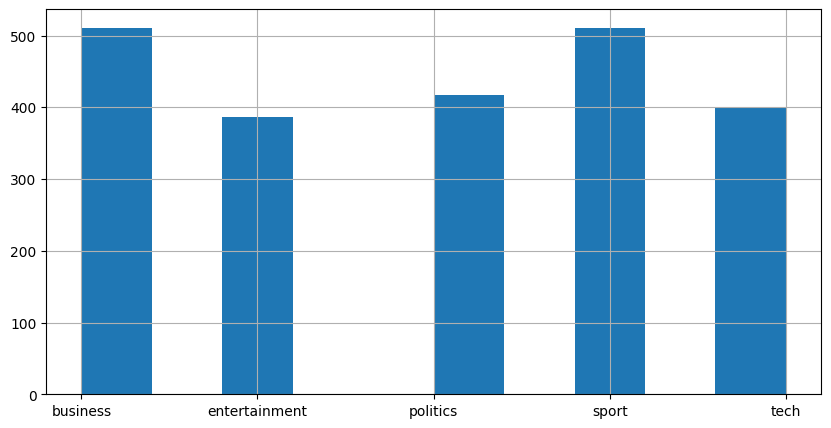

In [7]:
labels.hist(figsize=(10, 5));

In [8]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=45)

In [9]:
vectorizer = CountVectorizer()

In [10]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

# Percentage of values are non-zero

In [11]:
Xtrain

<1668x26052 sparse matrix of type '<class 'numpy.int64'>'
	with 334739 stored elements in Compressed Sparse Row format>

In [12]:
(Xtrain != 0 ).sum() / np.prod(Xtrain.shape)

0.007703164966874957

In [13]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score:', model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score: 0.9784560143626571


In [14]:
Xtrain.shape

(1668, 26052)

# Count Vectorizer with stopwords

In [15]:
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score:', model.score(Xtest, Ytest))

train score: 0.9946043165467626
test score: 0.9784560143626571


In [16]:
Xtrain.shape

(1668, 25759)

# Count Vectorizer with StemTokenizer

In [17]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [18]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score:', model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9916067146282974
test score: 0.9748653500897666


In [19]:
Xtrain.shape

(1668, 22623)

# Count Vectorizer with simple Tokenizer

In [20]:
def simple_tokenizer(s):
  return s.split()

In [21]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score:', model.score(Xtrain, Ytrain))
print('test score:', model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9946043165467626
test score: 0.9658886894075404


In [22]:
Xtrain.shape

(1668, 51729)

# ANN with TFIDF

In [5]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [6]:
# map classes to integers from 0....K-1
df['targets'] = df['labels'].astype('category').cat.codes

In [7]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [8]:
# create a tf-idf vectorizer object
tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test['text'])

In [9]:
Ytrain = df_train['targets']
Ytest = df_test['targets']

In [10]:
# number of classes
K = df['targets'].max() + 1
K

5

In [11]:
# input dimensions
D = Xtrain.shape[1]

In [12]:
D

25329

In [13]:
# build model
i = Input(shape=(D,))
x = Dense(300, activation='relu')(i)
x = Dense(K)(x) # softmax included in loss

model = Model(i,x)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25329)]           0         
                                                                 
 dense (Dense)               (None, 300)               7599000   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7600505 (28.99 MB)
Trainable params: 7600505 (28.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
# data must not be sparse matrix before passing into tensorflow
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [17]:
r = model.fit(Xtrain, Ytrain,
    validation_data=(Xtest, Ytest),
    epochs=7,
    batch_size=128,
  )

Epoch 1/7
13/13 [==============================] - 4s 285ms/step - loss: 1.4635 - accuracy: 0.7681 - val_loss: 1.1925 - val_accuracy: 0.9371
Epoch 2/7
13/13 [==============================] - 3s 254ms/step - loss: 0.9139 - accuracy: 0.9904 - val_loss: 0.7309 - val_accuracy: 0.9626
Epoch 3/7
13/13 [==============================] - 2s 186ms/step - loss: 0.4546 - accuracy: 0.9974 - val_loss: 0.4163 - val_accuracy: 0.9746
Epoch 4/7
13/13 [==============================] - 2s 186ms/step - loss: 0.2049 - accuracy: 0.9981 - val_loss: 0.2605 - val_accuracy: 0.9805
Epoch 5/7
13/13 [==============================] - 2s 188ms/step - loss: 0.0992 - accuracy: 0.9987 - val_loss: 0.1913 - val_accuracy: 0.9805
Epoch 6/7
13/13 [==============================] - 3s 213ms/step - loss: 0.0565 - accuracy: 0.9994 - val_loss: 0.1566 - val_accuracy: 0.9790
Epoch 7/7
13/13 [==============================] - 4s 288ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.1366 - val_accuracy: 0.9805


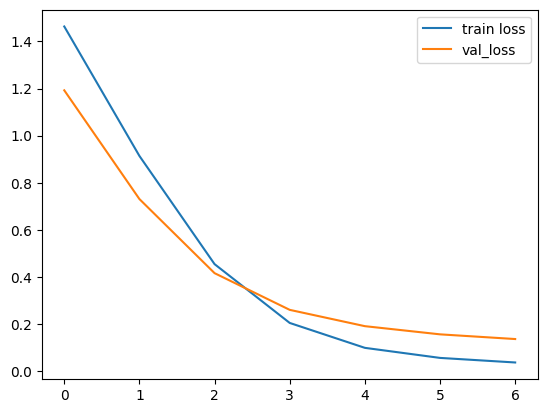

In [18]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [23]:
r.history['val_accuracy']

[0.9371257424354553,
 0.96257483959198,
 0.9745509028434753,
 0.9805389046669006,
 0.9805389046669006,
 0.9790419340133667,
 0.9805389046669006]

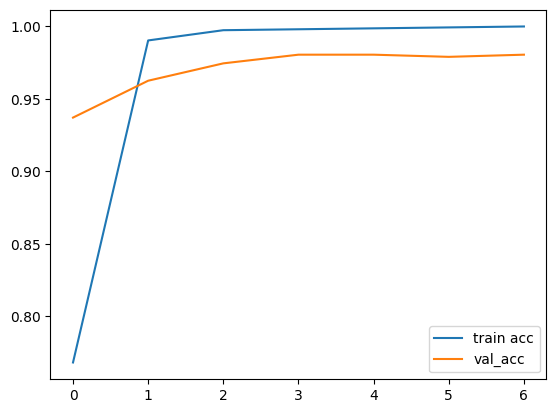

In [19]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

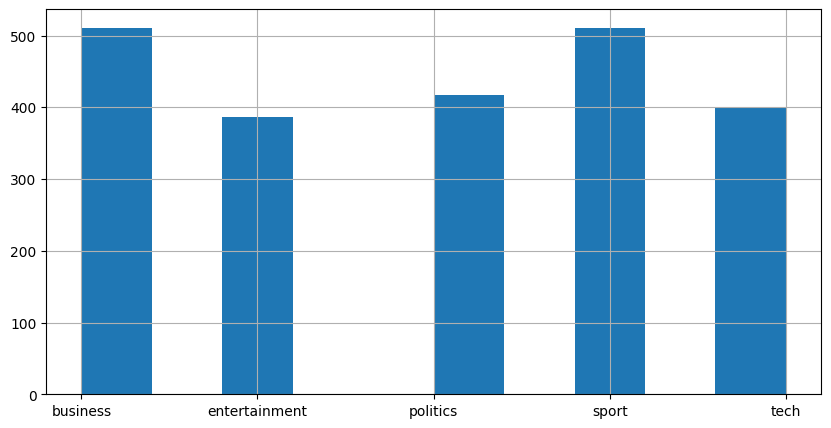

In [20]:
df['labels'].hist(figsize=(10, 5));